In [10]:
# Importing necessary libraries for EDA
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('/content/historic.csv')

data.head()


,item_no,category,main_promotion,color,stars,success_indicator
0,739157,Tunic,Catalog,Green,3.1,flop
1,591846,Hoodie,Category_Highlight,Red,1.5,flop
2,337574,Sweatshirt,Catalog,Red,4.4,top
3,401933,Polo-Shirt,Category_Highlight,Blue,3.1,flop
4,812151,Hoodie,Category_Highlight,Green,4.1,top


In [11]:
data.columns

Index(['item_no', 'category', 'main_promotion', 'color', 'stars',
       'success_indicator'],
      dtype='object')

### Check for Missing Values:
This step identifies if there are any missing values in the dataset. It's important to handle missing values before proceeding with the analysis and modeling.


In [12]:
data.isnull().sum()


,0
item_no,0
category,0
main_promotion,0
color,0
stars,0
success_indicator,0


### Summary Statistics:
Here, we generate summary statistics for the `stars` column, which is the only numerical column. This will show metrics like mean, standard deviation, min, and max values, giving us a sense of the distribution of reviews.


In [13]:
data.describe()

,item_no,stars
count,8000.000000,8000.000000
mean,546474.338375,3.473075
std,256513.463874,0.978810
min,100171.000000,0.300000
25%,325001.500000,2.800000
50%,547081.000000,3.500000
75%,764312.250000,4.200000
max,989740.000000,6.100000


### Count Plot for Categorical Variables:
We create count plots for the `category`, `main_promotion`, and `color` columns to visualize the distribution of products across different categories, promotions, and colors. This helps to understand the dominant categories, promotions, and colors in the data.


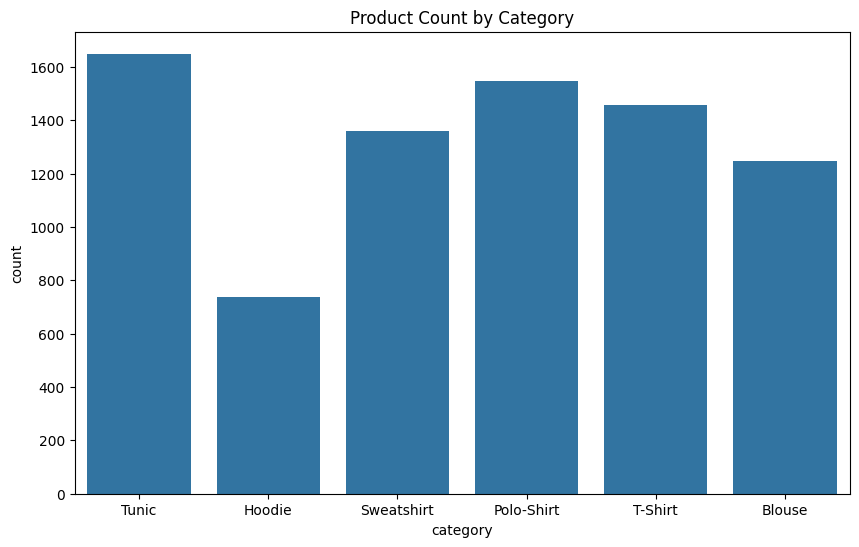

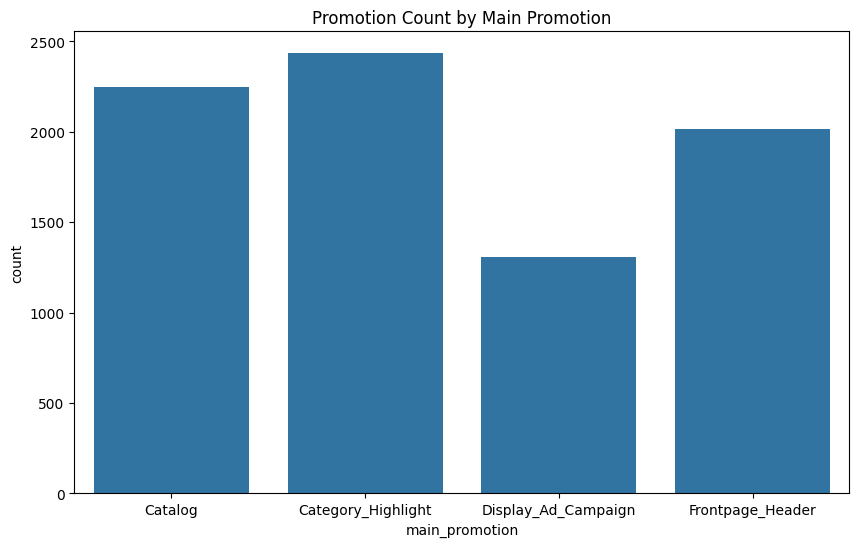

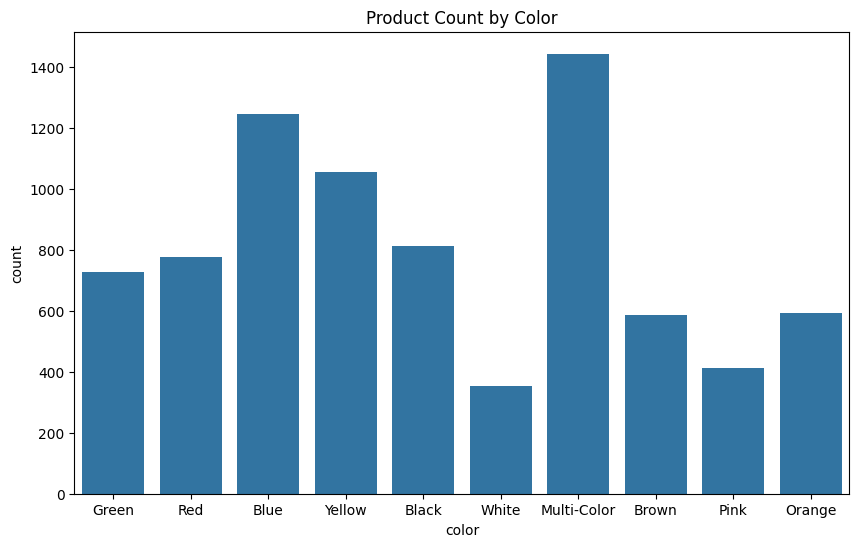

In [14]:
# Count plot for 'category'
plt.figure(figsize=(10, 6))
sns.countplot(x='category', data=data)
plt.title('Product Count by Category')
plt.show()

# Count plot for 'main_promotion'
plt.figure(figsize=(10, 6))
sns.countplot(x='main_promotion', data=data)
plt.title('Promotion Count by Main Promotion')
plt.show()

# Count plot for 'color'
plt.figure(figsize=(10, 6))
sns.countplot(x='color', data=data)
plt.title('Product Count by Color')
plt.show()


### Distribution of 'Stars' Ratings:
A histogram with a KDE plot is used to visualize the distribution of `stars` (ratings). This helps to understand how reviews are distributed for different products.


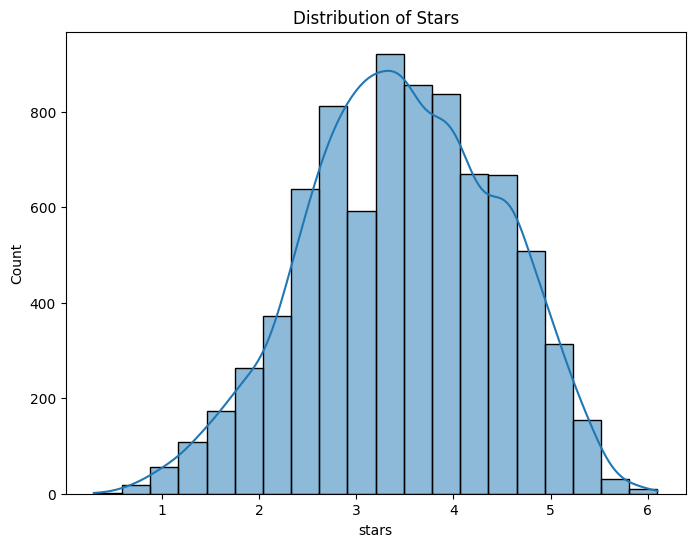

In [15]:
plt.figure(figsize=(8, 6))
sns.histplot(data['stars'], bins=20, kde=True)
plt.title('Distribution of Stars')
plt.show()

### Correlation Heatmap:
We create a correlation heatmap between `stars` (the only numerical variable) and the target variable `success_indicator`. This shows how strongly the reviews (stars) are correlated with the success of the product.


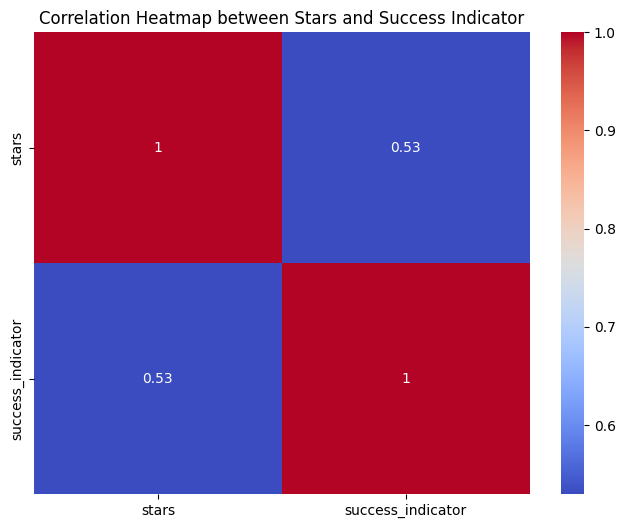

In [16]:
data['success_indicator'] = data['success_indicator'].map({'top': 1, 'flop': 0})

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data[['stars', 'success_indicator']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap between Stars and Success Indicator')
plt.show()


### Boxplot of Stars by Category:
We use a boxplot to visualize the distribution of `stars` across different `categories`. Boxplots help in identifying outliers and understanding the spread of reviews in each category.


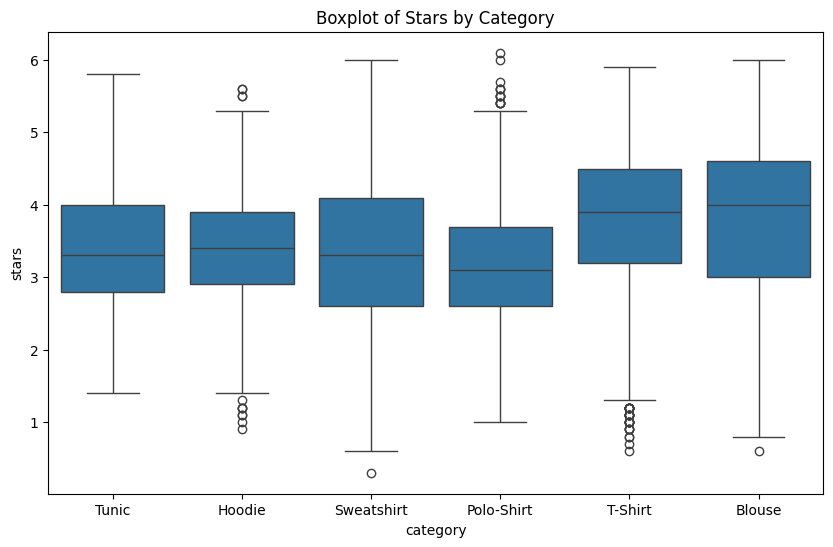

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='category', y='stars', data=data)
plt.title('Boxplot of Stars by Category')
plt.show()


### Success Rate by Category:
This calculates the success rate of products in each `category`. It helps to identify which categories have the highest likelihood of producing successful (top) products.


In [18]:
success_rate = data.groupby('category')['success_indicator'].mean().sort_values(ascending=False)
print(success_rate)

category
T-Shirt       0.814256
Blouse        0.708668
Sweatshirt    0.666912
Hoodie        0.650880
Tunic         0.604242
Polo-Shirt    0.471539
Name: success_indicator, dtype: float64
